# Env

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

from google.colab import files
import os
import cv2
import dlib
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

from yolov5 import utils
display = utils.notebook_init()
os.makedirs('/content/images', exist_ok=True)

YOLOv5 🚀 v6.1-51-g9cd89b7 torch 1.10.0+cu111 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/107.7 GB disk)


# Detection

## YoLo v5

Here, we use YoLo v5 as an example for detection, which is easy to use

In [ ]:
%cd /content/yolov5
print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/
!python detect.py --weights yolov5s.pt --img 256 --conf 0.25 --source ../images

/content/yolov5
if you want to use the default images, just click `Cancel upload`


Saving 00001.png to 00001.png
Saving 00010.png to 00010.png
Saving test.jpg to test.jpg
detect: weights=['yolov5s.pt'], source=../images, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-51-g9cd89b7 torch 1.10.0+cu111 CPU

100% 14.1M/14.1M [00:00<00:00, 104MB/s] 

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/3 /content/images/00001.png: 256x256 1 person, Done. (0.086s)
image 2/3 /content/images/00010.png: 256x256 1 person, Done. (0.086s)
image 3/3 /content/images/test.jpg: 160x256 1 person, 1 clock, Done. (0.056s)
Speed: 0.7ms pre-process, 75.9ms inference, 7.4ms NMS per image at shape (1, 3, 2

## Dlib

Dlib is a useful library for face detection & face landmark detection

In [ ]:
## conda/pip install dlib
%cd /content
print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/
fnames = [os.path.join('images', fname) for fname in os.listdir('images')]

/content
if you want to use the default images, just click `Cancel upload`


/content


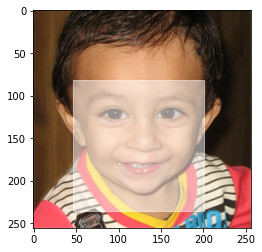

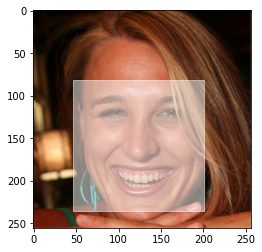

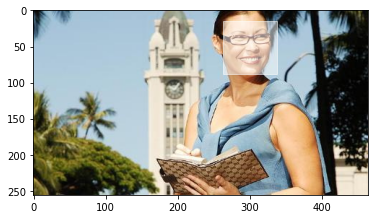

In [ ]:
%cd /content
detector = dlib.get_frontal_face_detector()
for fname in fnames:
  img = cv2.imread(fname, cv2.IMREAD_COLOR)[..., ::-1]
  dets = detector(img, 1)
  for rec in dets:
    fig, ax = plt.subplots(1, 1)
    ax.imshow(img)
    l, r, u, b = np.maximum(rec.left(), 0), np.minimum(rec.right(), img.shape[1]), \
                 np.maximum(rec.top(), 0), np.minimum(rec.bottom(), img.shape[0])
    ax.add_patch(patches.Rectangle((l, u), r-l, b-u, color=(1,1,1,0.5)))
    plt.show()

# Segmentation

## DeepLab v3+

In [ ]:
%cd /content
!git clone https://github.com/VainF/DeepLabV3Plus-Pytorch
%cd DeepLabV3Plus-Pytorch
%pip install -r requirements.txt
os.makedirs('checkpoints', exist_ok=True)
if not os.path.isfile('./checkpoints/all.zip'):
  !wget -O ./checkpoints/all.zip https://www.dropbox.com/sh/w3z9z8lqpi8b2w7/AAB0vkl4F5vy6HdIhmRCTKHSa?dl=1
  !unzip ./checkpoints/all.zip -d ./checkpoints/

/content
Cloning into 'DeepLabV3Plus-Pytorch'...
remote: Enumerating objects: 652, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 652 (delta 57), reused 58 (delta 27), pack-reused 537
Receiving objects: 100% (652/652), 8.24 MiB | 9.69 MiB/s, done.
Resolving deltas: 100% (347/347), done.
/content/DeepLabV3Plus-Pytorch
     |████████████████████████████████| 676 kB 4.3 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=45b8e0f2b86d8e0c7e733b73a97436ae2a7ec74d6e6135399728c81f10184337
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=9c443a232437e379503f9b49b669c849954ace5016aaea01bf47e9b9d4f804a9
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd

In [ ]:
%cd /content/DeepLabV3Plus-Pytorch
print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/
!python predict.py --input ../images --model deeplabv3plus_mobilenet --ckpt checkpoints/best_deeplabv3plus_mobilenet_voc_os16.pth --save_val_results_to test_results

/content/DeepLabV3Plus-Pytorch
if you want to use the default images, just click `Cancel upload`


Backbone HRNet Pretrained weights at: ./checkpoints/hrnetv2_32_model_best_epoch96.pth, only usable for HRNetv2-32
Device: cpu
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100% 13.6M/13.6M [00:00<00:00, 54.0MB/s]
Resume model from checkpoints/best_deeplabv3plus_mobilenet_voc_os16.pth
100% 3/3 [00:00<00:00,  3.18it/s]


## Face Parsing

Face parsing is a special segmentation method, this time we use https://github.com/zllrunning/face-parsing.PyTorch.
And we have modified the code for running on CPU.

In [ ]:
%cd /content
!git clone https://github.com/CastellanLiu/face-parsing.PyTorch
%cd face-parsing.PyTorch
os.makedirs('res/cp', exist_ok=True)
if not os.path.isfile('./res/cp/79999_iter.pth'):
  !wget -O /content/face-parsing.PyTorch/res/cp/79999_iter.pth https://drive.google.com/u/0/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812&export=download

/content
Cloning into 'face-parsing.PyTorch'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 95 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (95/95), done.
/content/face-parsing.PyTorch
--2022-03-21 06:47:01--  https://drive.google.com/u/0/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812
Resolving drive.google.com (drive.google.com)... 74.125.23.100, 74.125.23.102, 74.125.23.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.100|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812 [following]
--2022-03-21 06:47:01--  https://drive.google.com/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc

In [ ]:
%cd /content/face-parsing.PyTorch

from test import evaluate
print("if you want to use the default images, just click `Cancel upload`")
uploaded = files.upload()
if len(uploaded) != 0:
  fnames = list(uploaded.keys())
  for fname in fnames:
    !mv $fname ../images/
evaluate(dspth='../images', cp='79999_iter.pth')

/content/face-parsing.PyTorch
if you want to use the default images, just click `Cancel upload`


running


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

done
[ 0  1  2  3  4  5  7  8 10 11 12 13 14 16 17]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17]
[ 0  1  3  8 11 12 13 14 16 17]
